<a href="https://colab.research.google.com/github/omerhac/arc_challenge/blob/master/arc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import json
from google.cloud import storage
from matplotlib import pyplot as plt
from matplotlib import colors

# Load data


In [0]:
## get paths
GCS_PATH = "gs://kds-d3cfb3d523ca35d2517017a78110126404d01fdea69417ce49950459"
training_filenames = tf.io.gfile.glob(GCS_PATH + "/training/*")
test_filenames = tf.io.gfile.glob(GCS_PATH + "/test/*")

In [0]:
# create dataset with filenames
training_dataset = tf.data.Dataset.list_files(training_filenames)

In [0]:
# load the jsons
def load_task(filename):
  task_json = tf.io.read_file(filename)
  return task_json

training_dataset = training_dataset.map(load_task)
training_dataset_numpy = tf.data.Dataset.as_numpy_iterator(training_dataset) # convert to numpy iterator

In [0]:
## create a numpy array of tasks (n_tasks, )
training_tasks = []
for task in training_dataset_numpy:
  training_tasks.append(json.loads(task))

training_tasks = np.stack(training_tasks)

## Utility functions

In [0]:
def plot_one(task, ax, i,train_or_test,input_or_output):
  """
  Plot one task on a given axis
  """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(task, axs[0,i],i,'train','input')
        plot_one(task, axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()        
        
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(task, axs[0],0,'test','input')
        plot_one(task, axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show() 

In [49]:
print(training_tasks[0]['train'])

[{'input': [[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0], [0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 8, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

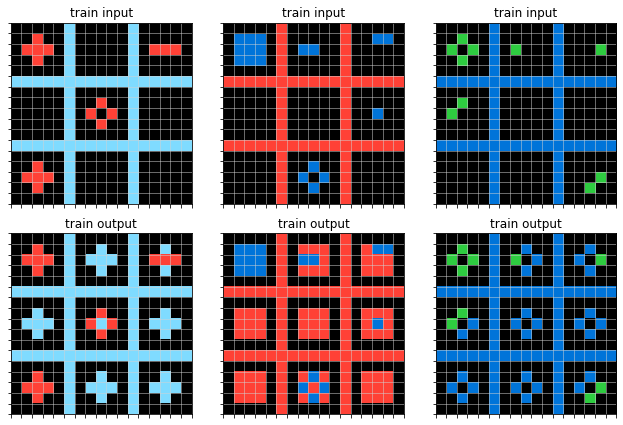

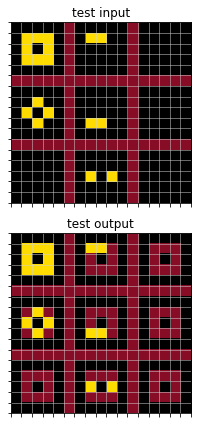

In [53]:
plot_task(training_tasks[1])